### 강남구의 읍면동별 중국집 분포도(전체인허가/정상영업/폐업 각각에 대해 시각화)
    - 치킨집 -> 중국집
    - 서대문구 -> 강남구 

In [62]:
import pandas as pd
import numpy as np
import squarify
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [4]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [5]:
data = pd.read_csv('../data/서울특별시_일반음식점.csv', 
                  encoding = 'cp949',
                  low_memory = False)

In [21]:
set(data.위생업태명[data.위생업태명.str.contains('중국식', na = False)])

{'중국식'}

In [18]:
set(data.영업상태명[data.영업상태명.str.contains('영업/정상', na = False)])

{'영업/정상'}

In [20]:
set(data.영업상태명[data.영업상태명.str.contains('폐업', na = False)])

{'폐업'}

In [22]:
data.head()

,번호,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지,Unnamed: 47
18,19,일반음식점,07_24_04_P,3070000,3070000-101-1985-02675,19850422,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,Y,202.34,NaN,NaN,NaN,NaN
24,25,일반음식점,07_24_04_P,3010000,3010000-101-1976-07071,19760116,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,87.34,NaN,NaN,NaN,NaN
31,32,일반음식점,07_24_04_P,3070000,3070000-101-1979-02653,19791107,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,33.00,NaN,NaN,NaN,NaN
34,35,일반음식점,07_24_04_P,3180000,3180000-101-1995-04082,19950213,NaN,1,영업/정상,1,...,0.0,NaN,0.0,0,N,46.24,NaN,NaN,NaN,NaN
133,134,일반음식점,07_24_04_P,3020000,3020000-101-1991-06929,19911115,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,40.18,NaN,NaN,NaN,NaN


In [25]:
data = data[(data.위생업태명.isin(['중국식']))]

In [78]:
data_fin = data[['소재지전체주소','위생업태명']]

In [79]:
set(data_fin.위생업태명) 

{'중국식'}

In [82]:
data_fin.head(3)

,소재지전체주소,위생업태명
18,서울특별시 성북구 안암동5가 134-35,중국식
24,서울특별시 중구 신당동 372-36번지 1층,중국식
31,서울특별시 성북구 장위동 66-108번지 1층,중국식


In [91]:
res = data_fin.소재지전체주소.str.contains('강남구', na = False)
data_gang = data_fin[res]
data_gang.head()

,소재지전체주소,위생업태명
1036,서울특별시 강남구 대치동 897-8,중국식
1490,서울특별시 강남구 신사동 541-13번지,중국식
1999,서울특별시 강남구 논현동 58-2번지 마일스디오빌,중국식
2000,서울특별시 강남구 삼성동 159-8번지 파르나스타워,중국식
8612,서울특별시 강남구 대치동 894,중국식


In [96]:
addr = data_gang.소재지전체주소.str.slice(start = 10, stop = 15)
addr

1036      대치동 8
1490      신사동 5
1999      논현동 5
2000      삼성동 1
8612      대치동 8
          ...  
471988    도곡동 4
472087    도곡동 4
472563    역삼동 7
472835    역삼동 8
472848    논현동 1
Name: 소재지전체주소, Length: 1177, dtype: object

In [97]:
i = 0
addr_fin = pd.Series() # 빈 시리즈 생성
for string in addr:
    newstring = re.sub(r'[0-9]+','', string).replace(' ', '').replace('-', '')
    addr_fin[i] = newstring
    i += 1

In [98]:
addr_fin

0       대치동
1       신사동
2       논현동
3       삼성동
4       대치동
       ... 
1172    도곡동
1173    도곡동
1174    역삼동
1175    역삼동
1176    논현동
Length: 1177, dtype: object

In [99]:
addr_fin.value_counts()

역삼동     280
논현동     167
대치동     159
삼성동     153
신사동     147
청담동      69
개포동      68
도곡동      51
압구정동     28
일원동      28
수서동      18
세곡동       5
자곡동       2
율현동       1
청담동산      1
Name: count, dtype: int64

In [100]:
addr_fin =  addr_fin.str.replace('청담동산', '청담동')

In [101]:
addr_fin

0       대치동
1       신사동
2       논현동
3       삼성동
4       대치동
       ... 
1172    도곡동
1173    도곡동
1174    역삼동
1175    역삼동
1176    논현동
Length: 1177, dtype: object

In [102]:
gang_cnt = addr_fin.value_counts()

<Axes: >

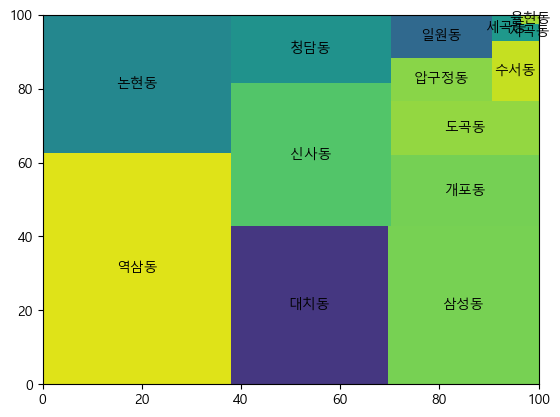

In [103]:
squarify.plot(gang_cnt, label = gang_cnt.index)

### 정상영업 중국 음식점 분포도

In [34]:
data_open = data[(data.영업상태명 == '영업/정상') & (data.위생업태명.isin(['중국식']))]
data_open = data_open[['소재지전체주소','위생업태명', '영업상태명']]

In [36]:
res = data_open.소재지전체주소.str.contains('강남구', na = False)
data_gang_open = data_open[res]
data_gang_open

,소재지전체주소,위생업태명,영업상태명
1036,서울특별시 강남구 대치동 897-8,중국식,영업/정상
1490,서울특별시 강남구 신사동 541-13번지,중국식,영업/정상
1999,서울특별시 강남구 논현동 58-2번지 마일스디오빌,중국식,영업/정상
2000,서울특별시 강남구 삼성동 159-8번지 파르나스타워,중국식,영업/정상
8612,서울특별시 강남구 대치동 894,중국식,영업/정상
...,...,...,...
121562,서울특별시 강남구 대치동 893 롯데캐슬아파트,중국식,영업/정상
121633,서울특별시 강남구 역삼동 704-53,중국식,영업/정상
121705,서울특별시 강남구 역삼동 673-26번지,중국식,영업/정상
121783,서울특별시 강남구 대치동 983-1 해암빌딩,중국식,영업/정상


In [58]:
addr = data_gang_open.소재지전체주소.str.slice(start = 10, stop = 17)
addr

1036      대치동 897
1490      신사동 541
1999      논현동 58-
2000      삼성동 159
8612      대치동 894
           ...   
121562    대치동 893
121633    역삼동 704
121705    역삼동 673
121783    대치동 983
123167    역삼동 825
Name: 소재지전체주소, Length: 380, dtype: object

In [59]:
import re # 정규식 패키지
# addr 변수에는 강남구 중국집 주소에서 동이름만 추출한 data가 저장
# 숫자와 공백이 포함되어 있는 data가 있기 떄문에 숫자와 공백을 제거
# 시리즈에 저장한다.
i = 0
addr_fin = pd.Series() # 빈 시리즈 생성
for string in addr:
    newstring = re.sub(r'[0-9]+','', string).replace(' ', '').replace('-', '')
    addr_fin[i] = newstring
    i += 1

In [60]:
addr_fin

0      대치동
1      신사동
2      논현동
3      삼성동
4      대치동
      ... 
375    대치동
376    역삼동
377    역삼동
378    대치동
379    역삼동
Length: 380, dtype: object

In [61]:
open_fin = addr_fin.value_counts()
open_fin

역삼동     104
대치동      60
논현동      54
신사동      48
삼성동      45
도곡동      16
청담동      16
개포동      10
일원동       8
수서동       7
압구정동      6
자곡동       2
개포동번      1
율현동       1
청담동삼      1
세곡동       1
Name: count, dtype: int64

<Axes: >

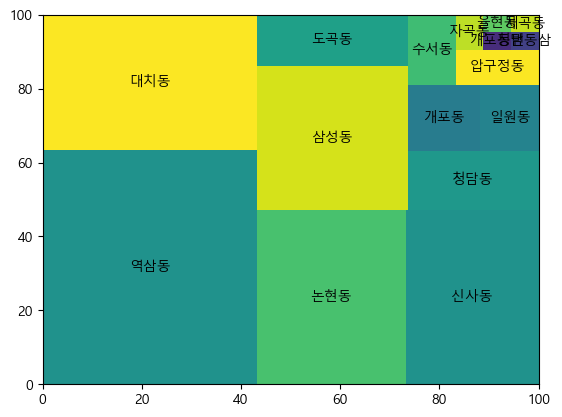

In [63]:
squarify.plot(open_fin, label = open_fin.index)

### 강남구 중국음식점 폐업

In [64]:
data_close = data[(data.영업상태명 == '폐업') & (data.위생업태명.isin(['중국식']))]
data_close  = data_close [['소재지전체주소','위생업태명', '영업상태명']]

In [104]:
data_close.head()

,소재지전체주소,위생업태명,영업상태명
124237,서울특별시 성북구 장위동 50-20번지 1층,중국식,폐업
124253,서울특별시 성북구 삼선동1가 13번지 복개지상 삼익아파트 104호,중국식,폐업
124303,서울특별시 서대문구 북아현동 130-11번지,중국식,폐업
124304,서울특별시 중구 무학동 12-1번지,중국식,폐업
124306,서울특별시 중구 남대문로4가 20-60번지,중국식,폐업


In [83]:
set(data_fin.위생업태명)

{'중국식'}

In [65]:
res = data_close.소재지전체주소.str.contains('강남구', na = False)
data_gang_close = data_close[res]
data_gang_close

,소재지전체주소,위생업태명,영업상태명
126689,서울특별시 강남구 대치동 991-10번지,중국식,폐업
126814,서울특별시 강남구 역삼동 818-11,중국식,폐업
126820,서울특별시 강남구 역삼동 832-12번지,중국식,폐업
126896,서울특별시 강남구 역삼동 648-9번지,중국식,폐업
127114,서울특별시 강남구 역삼동 603-4,중국식,폐업
...,...,...,...
471988,서울특별시 강남구 도곡동 467-17 타워팰리스,중국식,폐업
472087,서울특별시 강남구 도곡동 417-12 지상2층,중국식,폐업
472563,서울특별시 강남구 역삼동 736-41 지엠씨 타워,중국식,폐업
472835,서울특별시 강남구 역삼동 836-69 MARK TOWER,중국식,폐업


In [66]:
addr = data_gang_close.소재지전체주소.str.slice(start = 10, stop = 17)
addr

126689    대치동 991
126814    역삼동 818
126820    역삼동 832
126896    역삼동 648
127114    역삼동 603
           ...   
471988    도곡동 467
472087    도곡동 417
472563    역삼동 736
472835    역삼동 836
472848    논현동 198
Name: 소재지전체주소, Length: 797, dtype: object

In [69]:
import re # 정규식 패키지
# addr 변수에는 강남구 중국집 주소에서 동이름만 추출한 data가 저장
# 숫자와 공백이 포함되어 있는 data가 있기 떄문에 숫자와 공백을 제거
# 시리즈에 저장한다.
i = 0
addr_fin = pd.Series() # 빈 시리즈 생성
for string in addr:
    newstring = re.sub(r'[0-9]+','', string).replace(' ', '').replace('-', '')
    addr_fin[i] = newstring
    i += 1

In [70]:
addr_fin

0      대치동
1      역삼동
2      역삼동
3      역삼동
4      역삼동
      ... 
792    도곡동
793    도곡동
794    역삼동
795    역삼동
796    논현동
Length: 797, dtype: object

In [73]:
close_fin = addr_fin.value_counts()
close_fin

역삼동      176
논현동      112
삼성동      107
대치동       99
신사동       99
청담동       51
개포동       48
도곡동       35
압구정동      22
일원동       20
수서동       11
개포동번지      8
세곡동        4
청담동번지      1
삼성동번       1
논현동번       1
개포동번       1
청담동산       1
Name: count, dtype: int64

<Axes: >

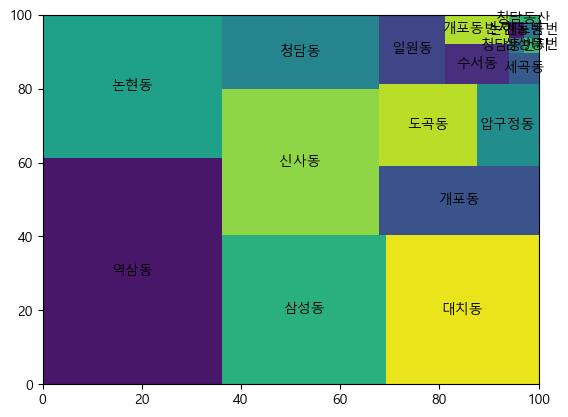

In [74]:
squarify.plot(close_fin, label = close_fin.index)